In [2]:
using GynC
using Plots
using LaTeXStrings

In [3]:
ts = [3,5]
#ts = [1,1.7] * sqrt(6/.7)
m = GynC.Federn.federmodel(ts = ts, xmax=50, nx=200, zmult=600, rho=1.5)

GynC.LikelihoodModel([1.0,1.24623,1.49246,1.73869,1.98492,2.23116,2.47739,2.72362,2.96985,3.21608  …  47.7839,48.0302,48.2764,48.5226,48.7688,49.0151,49.2613,49.5075,49.7538,50.0],Array{Float64,1}[[-3.39178,4.53283],[-2.02152,6.50268],[-0.744985,7.97363],[0.441326,9.00437],[1.54097,9.64897],[2.55738,9.95716],[3.49387,9.9746],[4.35363,9.74311],[5.13994,9.30091],[5.85575,8.68287]  …  [5.74643,-0.268911],[5.92335,0.0941372],[6.09703,0.456133],[6.26739,0.816611],[6.4344,1.17511],[6.59798,1.53119],[6.75808,1.88441],[6.91464,2.23434],[7.06763,2.58054],[7.21701,2.92262]],Array{Float64,1}[[-5.17344,5.6023],[-2.76105,4.90044],[-0.524401,7.63577],[-0.733247,12.5542],[1.49968,8.44146],[3.14575,11.158],[3.46264,10.9151],[1.66316,8.78625],[8.27061,7.58274],[5.20056,9.00697]  …  [5.20681,-1.40646],[7.01344,-0.471549],[3.38262,-1.68944],[8.23146,2.18928],[7.8155,1.65681],[5.75778,3.20584],[5.27861,2.38764],[7.77097,-0.420866],[6.385,2.47025],[8.69096,5.19753]],Any[],ZeroMeanIsoNormal(
dim: 2
μ: [0.0,

In [4]:
w0 = GynC.uniformweights(m);

In [ ]:
@time wz1 = GynC.mple(m, w0, 101, 1, 1)[end]

In [ ]:
@show GynC.hz(m, wz1)
plot(wz1)

In [5]:
@time wz2 = GynC.mple(m, w0, 1001, 1, 1)[end]

computing likelihood matrix (120000x200)

 (22.349163699 seconds)
247.664787 seconds (145.03 M allocations: 9.898 GB, 3.38% gc time)


200-element Array{Float64,1}:
 0.0279156   
 0.00750977  
 0.0241626   
 0.0199479   
 0.0134799   
 0.00482202  
 5.2113e-30  
 0.0370284   
 0.000678307 
 0.00177614  
 0.016922    
 0.0289903   
 1.21895e-56 
 ⋮           
 2.42677e-107
 4.82876e-98 
 1.61139e-128
 0.00971496  
 1.89844e-232
 0.0109946   
 0.00439484  
 2.17276e-223
 9.81745e-90 
 0.00214833  
 0.00388541  
 9.84719e-253

GynC.hz(m,wz2) = 6.265203437078171



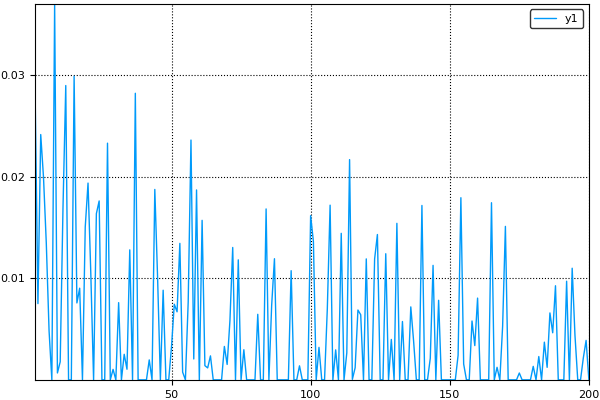

In [6]:
@show GynC.hz(m, wz2)
plot(wz2)

In [10]:
@time wz3 = GynC.mple(m, wz2, 2001, 1, 1)[end]

539.811859 seconds (60.58 k allocations: 7.193 GB, 0.19% gc time)


200-element Array{Float64,1}:
 0.0337104  
 0.00799784 
 0.0244236  
 0.0198602  
 0.0140503  
 0.0        
 0.0        
 0.0456917  
 0.0        
 0.0        
 0.0119475  
 0.0329415  
 0.0        
 ⋮          
 0.0        
 0.0        
 0.0        
 0.00769437 
 0.0        
 0.0161942  
 0.000345602
 0.0        
 0.0        
 0.00280153 
 0.00304207 
 0.0        

GynC.hz(m,wz3) = 6.268950243810341



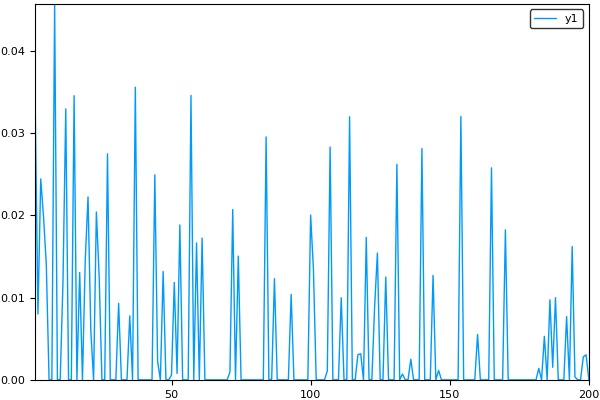

In [11]:
@show GynC.hz(m, wz3)
plot(wz3)

GynC.hz(m,wzo) = 6.2670841681531275



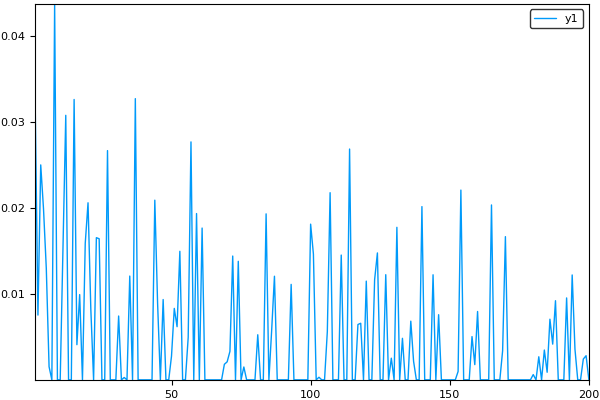

In [15]:
wzo = GynC.optimineq(m, 1, w0)
@show GynC.hz(m,wzo)
plot(wzo)

In [16]:
wz = wzo

200-element Array{Float64,1}:
 0.0323359 
 0.00753891
 0.0250182 
 0.0199109 
 0.0129956 
 0.00152979
 1.0e-12   
 0.0437538 
 1.0e-12   
 1.0e-12   
 0.0151105 
 0.0307893 
 1.0e-12   
 ⋮         
 1.0e-12   
 1.0e-12   
 1.0e-12   
 0.00953438
 1.0e-12   
 0.0122078 
 0.00356509
 1.0e-12   
 1.0e-12   
 0.00241984
 0.00280895
 1.0e-12   


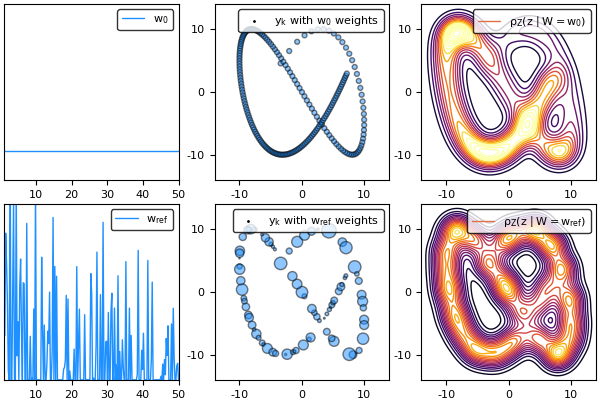

In [17]:
function scatter(ys::Vector{Vector{Float64}}; kwargs...)
  m = hcat(ys...)                                      
  Plots.scatter(m[1,:], m[2,:]; kwargs...)                   
end                                                                                                                                                                        
include("../src/eb/plot.jl")
pyplot(grid=false)

kdesigma = 1.5    
ms = 2
dlims = (0,0.03)
lims = (-14,14)  
clims = (0,0.004)                                                                                                   

msscale = length(m.ys) * ms                                                                                                                                                                  

p = []
labels = [[L"$w_0$", L"$y_k \ \mathrm{with} \  w_0  \ \mathrm{weights}$", L"$\rho_Z(z \mid W=w_0)$"], [L"$w_{\rm ref}$", L"$y_k \ \mathrm{with} \ w_{\rm ref} \ \mathrm{weights}$", L"$\rho_Z(z \mid W=w_{\rm ref})$"]]
for (w,l) in zip([w0, wz], labels)
  push!(p, plot(m.xs, w, label=l[1], ylims=dlims, linewidth=1, color=:dodgerblue, yticks=false))
  tmp = scatter([[NaN,NaN]], label=l[2])
  push!(p, scatter!(tmp, unfoldcols(m.ys)..., ms=sqrt(w)*msscale/8, lims=lims, label="", color=:dodgerblue, alpha=0.5))
  push!(p, plot_kde(m.ys, w, bandwidth=kdesigma, lims=lims, clims=clims, cbar=false, label=l[3], legend=true))                                                                       
  plot!(p[end], [1],[1], ms=0, label=l[3])
end
plot(p..., layout=(2,3))#, legendfont = font(18))

In [9]:
savefig("2dcounterex.pdf")